Explore the dataset

In [3]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set random seed
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Plot settings
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/ML_Project_2/data/train_dataset.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nColumn Names:")
print(df.columns.tolist())
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Shape: (38984, 23)

Column Names:
['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking']


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


TARGET VARIABLE: Smoking Status

Class Distribution:
smoking
0    24666
1    14318
Name: count, dtype: int64

Class Percentage:
smoking
0    63.27
1    36.73
Name: proportion, dtype: float64


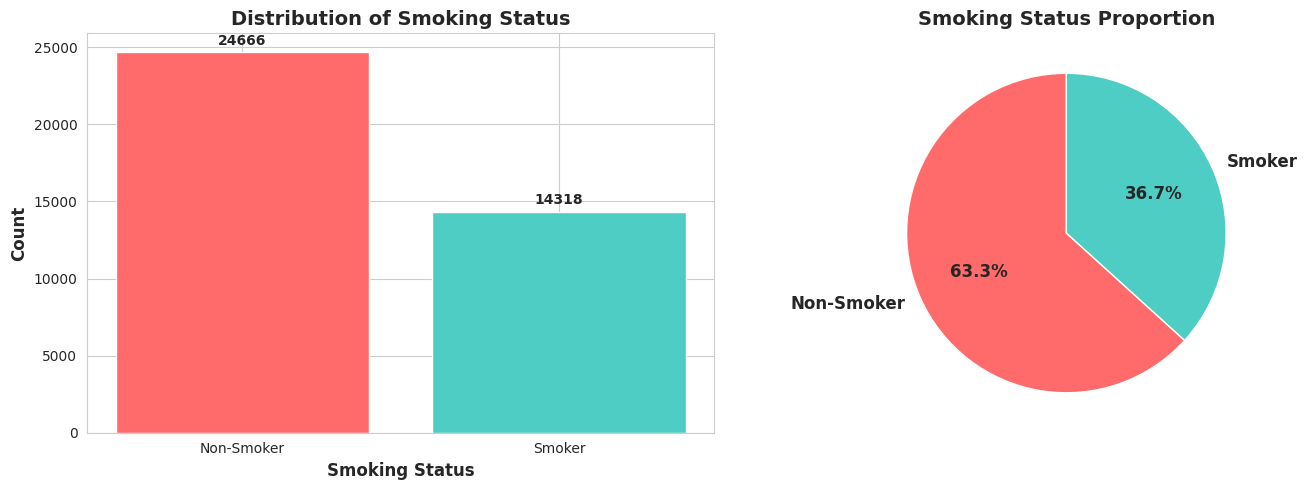


⚠️ Class Imbalance Ratio: 1.72:1
→ Significant imbalance detected. Consider using SMOTE or class weights.


In [4]:
# Target distribution
print("="*60)
print("TARGET VARIABLE: Smoking Status")
print("="*60)

target_counts = df['smoking'].value_counts()
target_pct = df['smoking'].value_counts(normalize=True) * 100

print(f"\nClass Distribution:")
print(target_counts)
print(f"\nClass Percentage:")
print(target_pct.round(2))

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
axes[0].bar(target_counts.index, target_counts.values, color=['#FF6B6B', '#4ECDC4'])
axes[0].set_xlabel('Smoking Status', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Smoking Status', fontsize=14, fontweight='bold')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Non-Smoker', 'Smoker'])
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 500, str(v), ha='center', fontweight='bold')

# Pie chart
colors = ['#FF6B6B', '#4ECDC4']
axes[1].pie(target_counts.values, labels=['Non-Smoker', 'Smoker'],
            autopct='%1.1f%%', colors=colors, startangle=90,
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Smoking Status Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Check for class imbalance
ratio = target_counts.max() / target_counts.min()
print(f"\n⚠️ Class Imbalance Ratio: {ratio:.2f}:1")
if ratio > 1.5:
    print("→ Significant imbalance detected. Consider using SMOTE or class weights.")
else:
    print("→ Classes are relatively balanced.")

In [5]:
# Basic info
print("="*60)
print("DATASET INFORMATION")
print("="*60)
print(f"\nNumber of Features: {df.shape[1] - 1}")
print(f"Number of Samples: {df.shape[0]}")
print(f"\nData Types:")
print(df.dtypes.value_counts())

# Missing values
print("\n" + "="*60)
print("MISSING VALUES CHECK")
print("="*60)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

if missing.sum() == 0:
    print("✓ No missing values detected!")
else:
    missing_df = pd.DataFrame({
        'Missing Count': missing[missing > 0],
        'Percentage': missing_pct[missing > 0].round(2)
    })
    print(missing_df)

# Duplicate check
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")
if duplicates > 0:
    print("⚠️ Consider removing duplicates")

# Basic statistics
print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)
df.describe().T

DATASET INFORMATION

Number of Features: 22
Number of Samples: 38984

Data Types:
int64      18
float64     5
Name: count, dtype: int64

MISSING VALUES CHECK
✓ No missing values detected!

Duplicate Rows: 5517
⚠️ Consider removing duplicates

STATISTICAL SUMMARY


,count,mean,std,min,25%,50%,75%,max
age,38984.0,44.127591,12.063564,20.0,40.0,40.0,55.0,85.0
height(cm),38984.0,164.689488,9.187507,130.0,160.0,165.0,170.0,190.0
weight(kg),38984.0,65.938718,12.896581,30.0,55.0,65.0,75.0,135.0
waist(cm),38984.0,82.062115,9.326798,51.0,76.0,82.0,88.0,129.0
eyesight(left),38984.0,1.014955,0.498527,0.1,0.8,1.0,1.2,9.9
eyesight(right),38984.0,1.008768,0.493813,0.1,0.8,1.0,1.2,9.9
hearing(left),38984.0,1.025369,0.157246,1.0,1.0,1.0,1.0,2.0
hearing(right),38984.0,1.026190,0.159703,1.0,1.0,1.0,1.0,2.0
systolic,38984.0,121.475631,13.643521,71.0,112.0,120.0,130.0,233.0
relaxation,38984.0,75.994408,9.658734,40.0,70.0,76.0,82.0,146.0


Analyzing 22 numerical features...


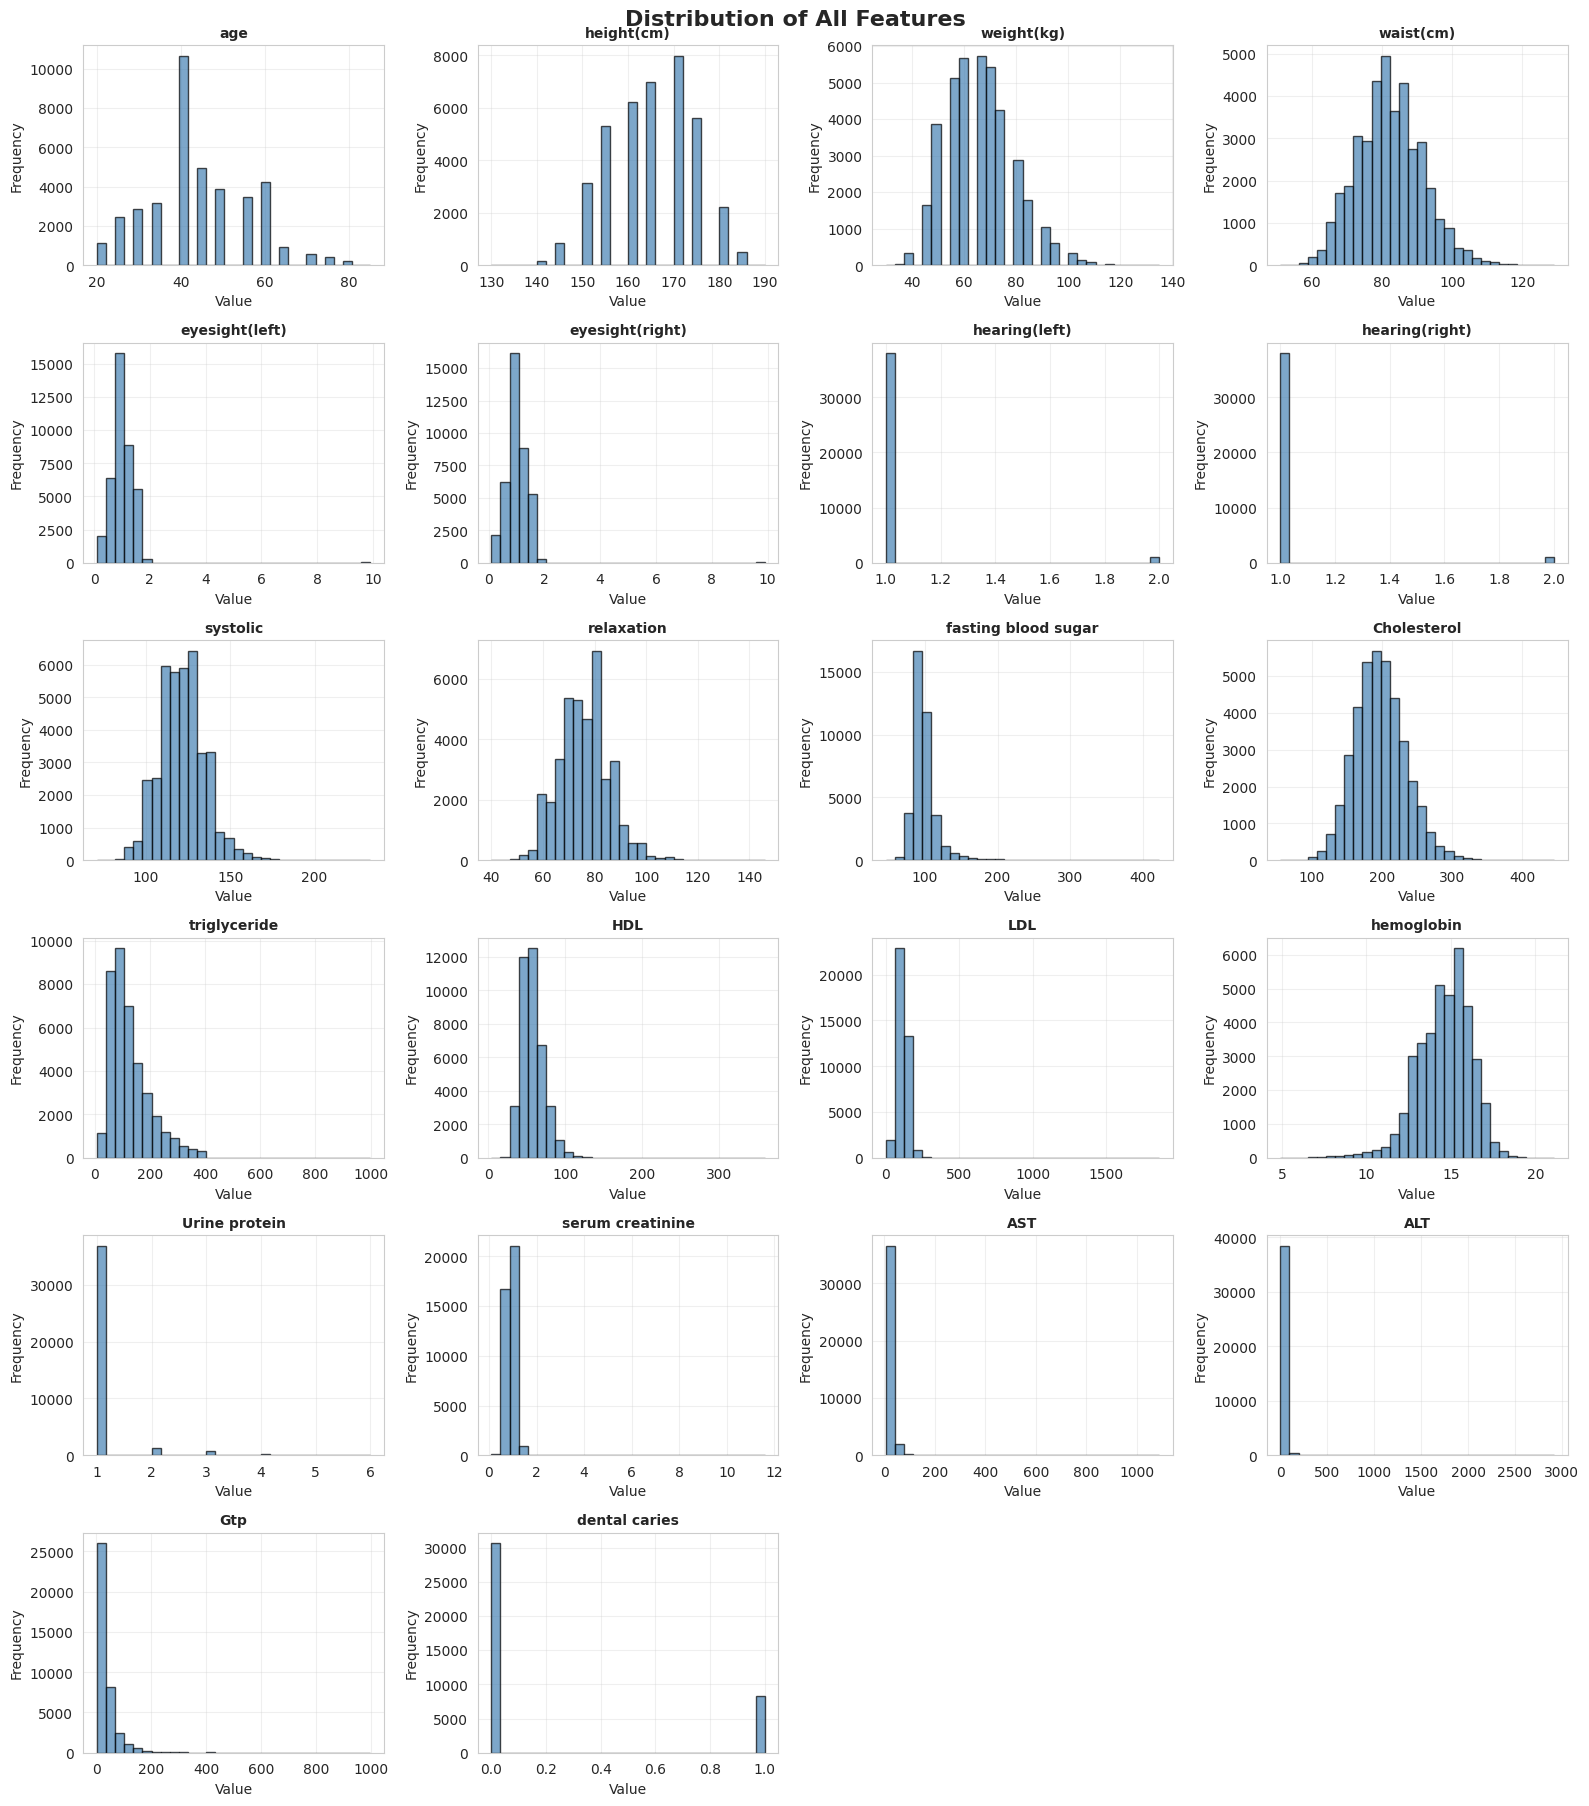


SKEWNESS ANALYSIS

Highly Skewed Features (|skew| > 1):
ALT                    36.169306
AST                    24.000164
LDL                    11.764551
eyesight(right)        10.117849
eyesight(left)         10.107092
serum creatinine        9.025683
Gtp                     6.775446
hearing(left)           6.037088
hearing(right)          5.933951
Urine protein           5.587743
fasting blood sugar     4.323974
dental caries           1.391694
triglyceride            1.336626
HDL                     1.086995
dtype: float64

→ Consider log transformation or scaling


In [6]:
# Get numerical features (exclude target)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'smoking' in numerical_cols:
    numerical_cols.remove('smoking')

print(f"Analyzing {len(numerical_cols)} numerical features...")

# Plot distributions for all features
n_cols = 4
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
axes = axes.flatten() if n_rows > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
        axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel('Value')
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(True, alpha=0.3)

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Distribution of All Features', fontsize=16, fontweight='bold', y=1.001)
plt.show()

# Identify skewed features
print("\n" + "="*60)
print("SKEWNESS ANALYSIS")
print("="*60)
skewness = df[numerical_cols].skew().sort_values(ascending=False)
print("\nHighly Skewed Features (|skew| > 1):")
high_skew = skewness[abs(skewness) > 1]
if len(high_skew) > 0:
    print(high_skew)
    print("\n→ Consider log transformation or scaling")
else:
    print("No highly skewed features detected")

Comparing feature distributions between Smokers and Non-Smokers...


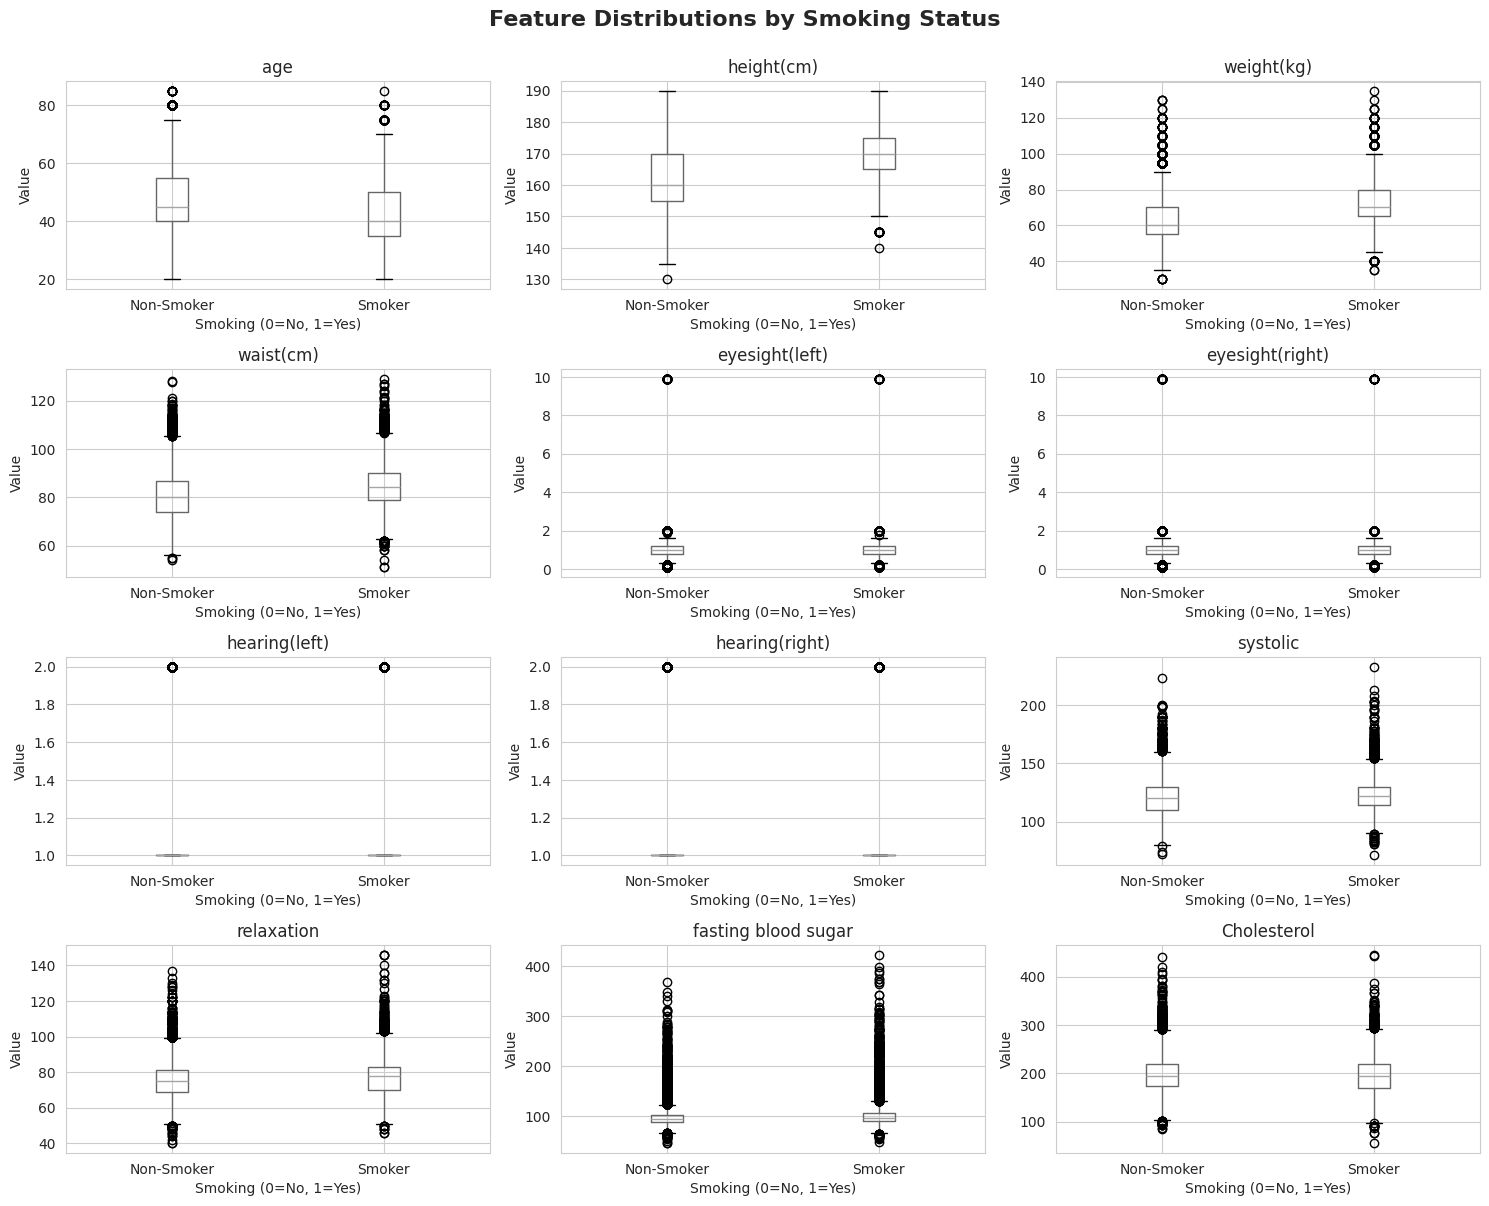


MEAN VALUES BY SMOKING STATUS
                     Non-Smoker      Smoker  Difference  Abs_Difference
triglyceride         113.015325  150.409624   37.394300       37.394300
Gtp                   30.808076   55.576617   24.768541       24.768541
weight(kg)            62.997446   71.005727    8.008281        8.008281
height(cm)           161.929376  169.444406    7.515029        7.515029
ALT                   24.792792   31.197723    6.404931        6.404931
HDL                   59.292346   53.849071   -5.443275        5.443275
waist(cm)             80.474949   84.796368    4.321419        4.321419
fasting blood sugar   97.770980  102.049169    4.278189        4.278189
age                   45.655761   41.494971   -4.160790        4.160790
LDL                  116.441539  112.738511   -3.703028        3.703028


In [7]:
# Box plots comparing smokers vs non-smokers
print("Comparing feature distributions between Smokers and Non-Smokers...")

# Select key features (first 12 for visualization)
features_to_plot = numerical_cols[:12]

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(features_to_plot):
    df.boxplot(column=col, by='smoking', ax=axes[idx])
    axes[idx].set_title(f'{col}')
    axes[idx].set_xlabel('Smoking (0=No, 1=Yes)')
    axes[idx].set_ylabel('Value')
    plt.sca(axes[idx])
    plt.xticks([1, 2], ['Non-Smoker', 'Smoker'])

plt.tight_layout()
plt.suptitle('Feature Distributions by Smoking Status', fontsize=16, fontweight='bold', y=1.001)
plt.show()

# Statistical comparison
print("\n" + "="*60)
print("MEAN VALUES BY SMOKING STATUS")
print("="*60)
comparison = df.groupby('smoking')[numerical_cols].mean().T
comparison.columns = ['Non-Smoker', 'Smoker']
comparison['Difference'] = comparison['Smoker'] - comparison['Non-Smoker']
comparison['Abs_Difference'] = abs(comparison['Difference'])
print(comparison.sort_values('Abs_Difference', ascending=False).head(10))

Computing correlation matrix...


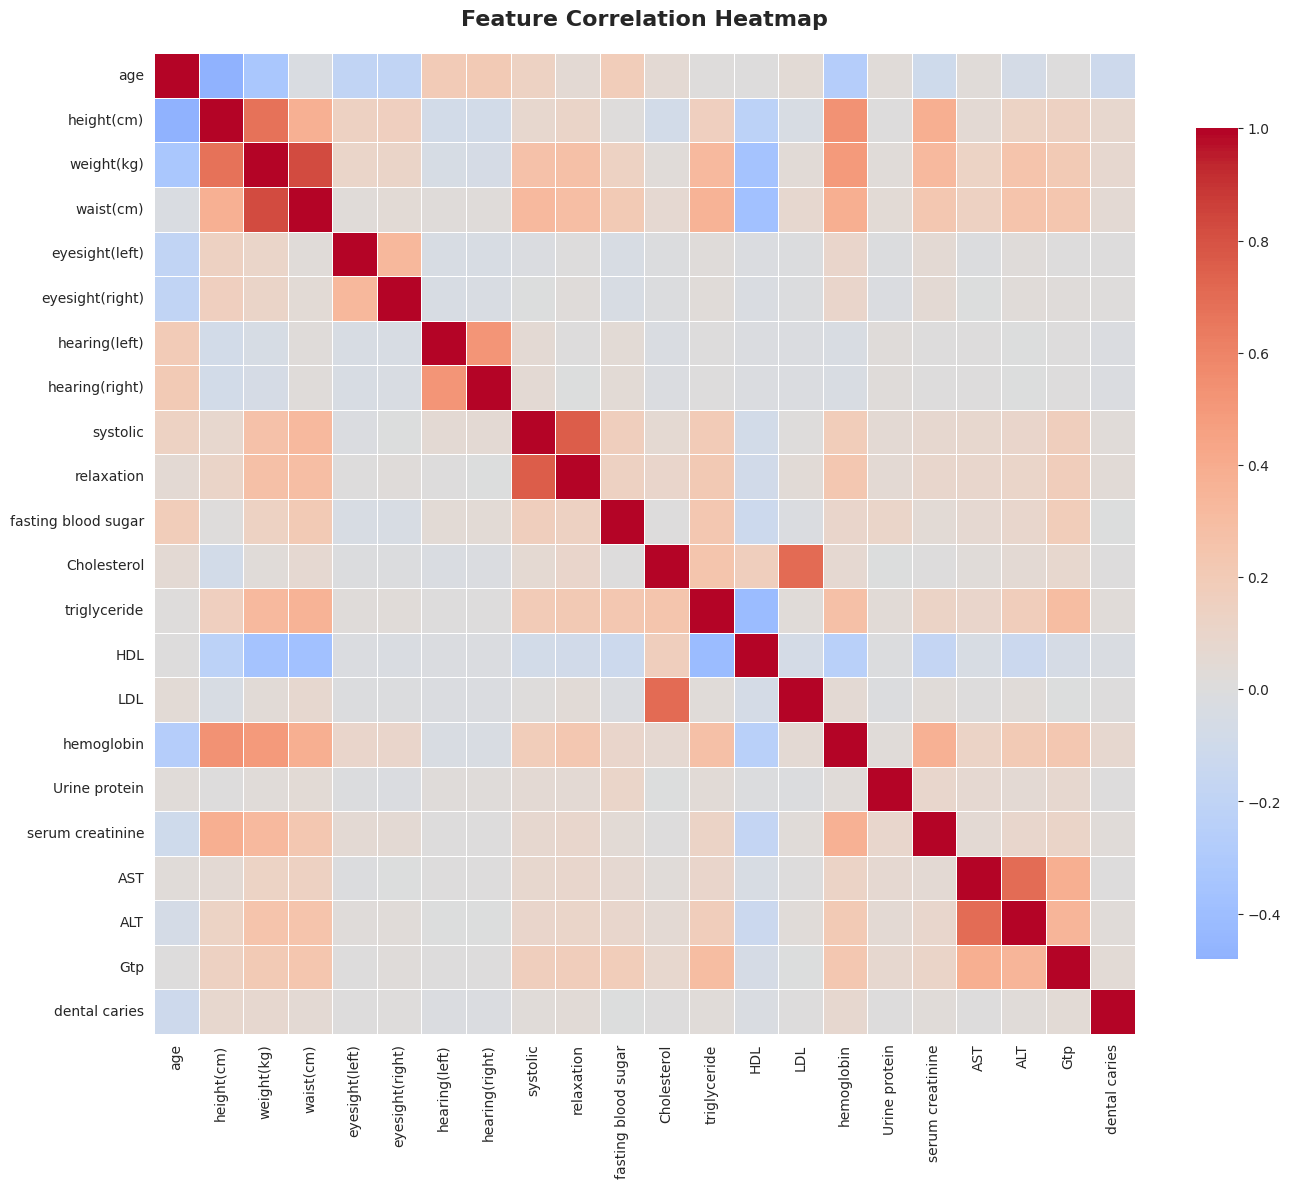


HIGH CORRELATIONS (|r| > 0.7)
    Feature 1    Feature 2  Correlation
0   waist(cm)   weight(kg)     0.824865
1  relaxation     systolic     0.759041
2         LDL  Cholesterol     0.707040

⚠️ Consider removing one feature from highly correlated pairs


In [8]:
# Correlation matrix
print("Computing correlation matrix...")

correlation_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm',
            center=0, square=True, linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identify highly correlated features
print("\n" + "="*60)
print("HIGH CORRELATIONS (|r| > 0.7)")
print("="*60)

# Get upper triangle of correlation matrix
upper_tri = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Find high correlations
high_corr = []
for column in upper_tri.columns:
    high_corr_features = upper_tri[column][abs(upper_tri[column]) > 0.7].index.tolist()
    for feature in high_corr_features:
        high_corr.append({
            'Feature 1': column,
            'Feature 2': feature,
            'Correlation': correlation_matrix.loc[column, feature]
        })

if high_corr:
    high_corr_df = pd.DataFrame(high_corr).sort_values('Correlation',
                                                        key=abs,
                                                        ascending=False)
    print(high_corr_df)
    print("\n⚠️ Consider removing one feature from highly correlated pairs")
else:
    print("✓ No highly correlated feature pairs found")

OUTLIER DETECTION (IQR Method)
                Feature  Outlier Count  Percentage
21        dental caries           8359   21.442130
20                  Gtp           3375    8.657398
19                  ALT           2642    6.777139
10  fasting blood sugar           2316    5.940899
17     serum creatinine           2189    5.615124
16        Urine protein           2148    5.509953
18                  AST           2111    5.415042
12         triglyceride           1607    4.122204
7        hearing(right)           1021    2.619023
6         hearing(left)            989    2.536938


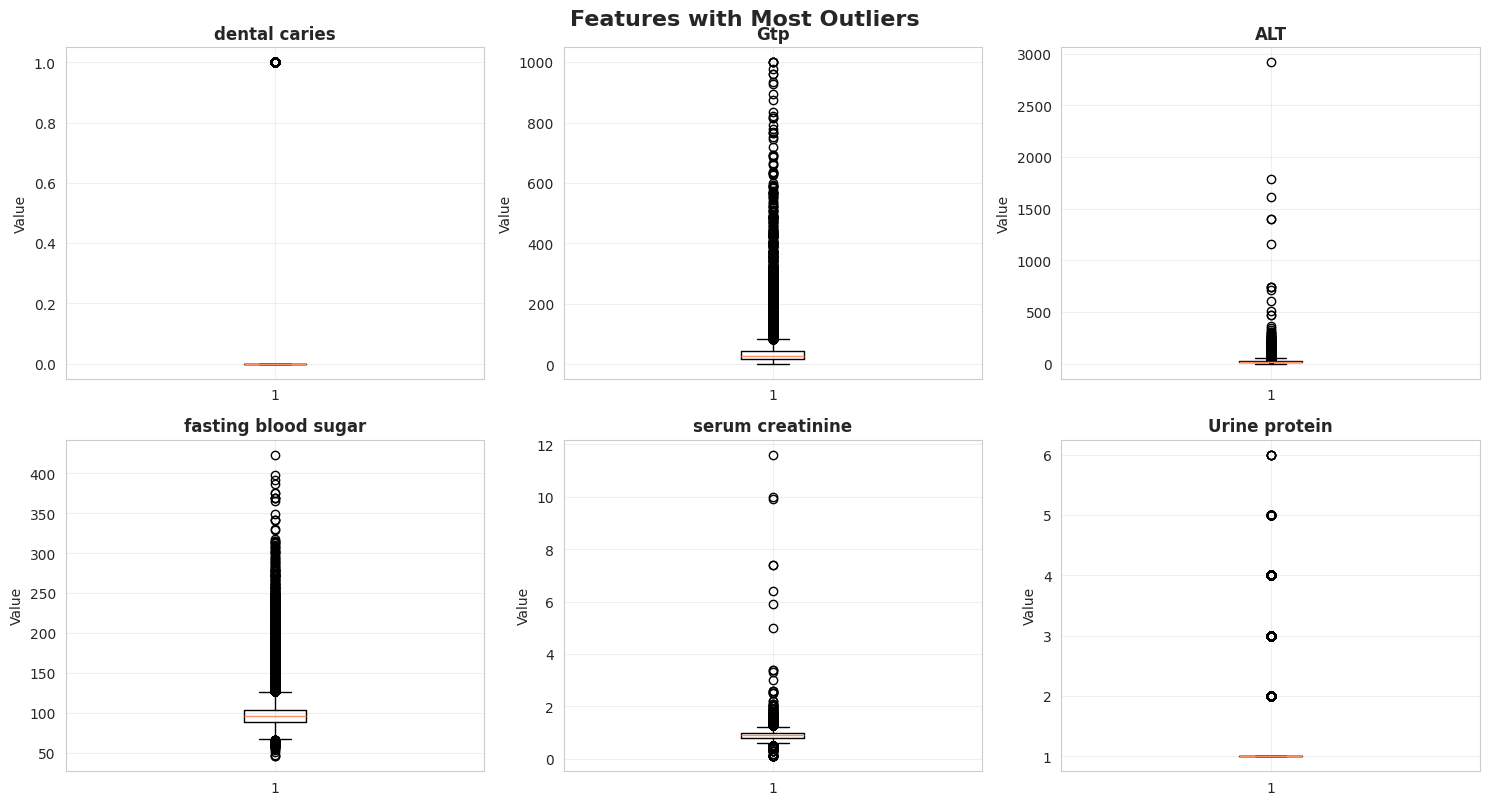


⚠️ Note: Outliers may be legitimate biosignal variations. Handle carefully.


In [9]:
# Detect outliers using IQR method
print("="*60)
print("OUTLIER DETECTION (IQR Method)")
print("="*60)

outlier_summary = []

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100

    outlier_summary.append({
        'Feature': col,
        'Outlier Count': outlier_count,
        'Percentage': outlier_pct
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values('Outlier Count', ascending=False)
print(outlier_df.head(10))

# Visualize top features with outliers
top_outlier_features = outlier_df.head(6)['Feature'].tolist()

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, col in enumerate(top_outlier_features):
    axes[idx].boxplot(df[col], vert=True)
    axes[idx].set_title(f'{col}', fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Features with Most Outliers', fontsize=16, fontweight='bold', y=1.001)
plt.show()

print("\n⚠️ Note: Outliers may be legitimate biosignal variations. Handle carefully.")

In [10]:
# Generate EDA summary
print("\n" + "="*60)
print("EDA SUMMARY - KEY FINDINGS")
print("="*60)

print("\n1. DATASET CHARACTERISTICS:")
print(f"   • Total samples: {df.shape[0]}")
print(f"   • Total features: {df.shape[1] - 1}")
print(f"   • Missing values: {df.isnull().sum().sum()}")
print(f"   • Duplicate rows: {df.duplicated().sum()}")

print("\n2. TARGET VARIABLE:")
smoker_ratio = df['smoking'].value_counts()[1] / df['smoking'].value_counts()[0]
print(f"   • Class distribution: {target_counts.to_dict()}")
print(f"   • Imbalance ratio: {max(smoker_ratio, 1/smoker_ratio):.2f}:1")

print("\n3. FEATURE CHARACTERISTICS:")
high_skew_count = len(skewness[abs(skewness) > 1])
print(f"   • Highly skewed features: {high_skew_count}")
high_corr_count = len(high_corr) if high_corr else 0
print(f"   • Highly correlated pairs: {high_corr_count}")

print("\n4. DATA QUALITY:")
total_outliers = outlier_df['Outlier Count'].sum()
print(f"   • Total outlier instances: {total_outliers}")
print(f"   • Features with >5% outliers: {len(outlier_df[outlier_df['Percentage'] > 5])}")

print("\n5. NEXT STEPS:")
print("   ✓ Preprocess data (scaling, handling outliers)")
print("   ✓ Split into train/test sets")
print("   ✓ Train models: Logistic Regression, SVM, Neural Networks")
print("   ✓ Compare model performance")

print("\n" + "="*60)


EDA SUMMARY - KEY FINDINGS

1. DATASET CHARACTERISTICS:
   • Total samples: 38984
   • Total features: 22
   • Missing values: 0
   • Duplicate rows: 5517

2. TARGET VARIABLE:
   • Class distribution: {0: 24666, 1: 14318}
   • Imbalance ratio: 1.72:1

3. FEATURE CHARACTERISTICS:
   • Highly skewed features: 14
   • Highly correlated pairs: 3

4. DATA QUALITY:
   • Total outlier instances: 32646
   • Features with >5% outliers: 7

5. NEXT STEPS:
   ✓ Preprocess data (scaling, handling outliers)
   ✓ Split into train/test sets
   ✓ Train models: Logistic Regression, SVM, Neural Networks
   ✓ Compare model performance

